# Cilia Data Analysis
This file will try to shed light on cilia data 

In [30]:
%matplotlib inline
import cv2 
import os
import sys
import numpy as np 
import glob
import matplotlib.pyplot as plt

In [63]:
samplehash =  '10a278dc5ebd2b93e1572a136578f9dbe84d10157cc6cca178c339d9ca762c52' #'7fafc640d446cab1872e4376b5c2649f8c67e658b3fc89d2bced3b47c929e608'#

In [64]:
files = sorted(glob.glob( "../data/train/data/" + samplehash  + "/frame*.png" ))

In [65]:
images = [  cv2.imread(x,0)  for x in files  ]

In [66]:
len(images)

100

In [67]:
mask = cv2.imread( "../data/train/data/" + samplehash  + "/mask.png" ,0 )

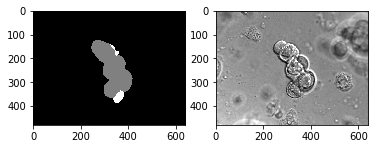

In [68]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow( mask*127, cmap='gray' )
plt.subplot(1,2,2)
plt.imshow(images[0], cmap='gray')

In [69]:
images = np.array(images)

In [70]:
variances = np.var( images , axis=0)

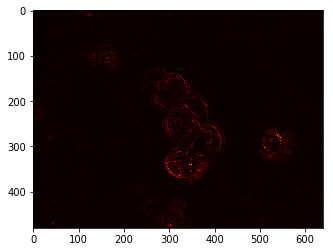

In [71]:
plt.figure()
plt.imshow( variances , cmap='hot' , interpolation='nearest')

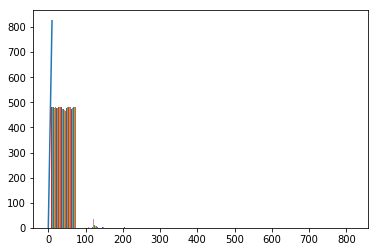

In [72]:
plt.plot( plt.hist(variances )[1] )

In [90]:
predicted_mask =  np.logical_and(  variances<100 , variances>10)

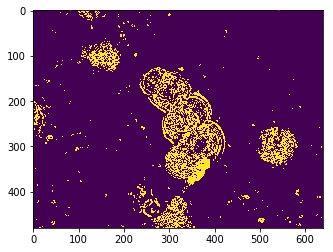

In [91]:
plt.figure()
plt.imshow(  predicted_mask.astype(int)*255   )

In [105]:
kernel = np.ones((9,9),np.float32)/81
dst = cv2.filter2D(variances,-1,kernel)

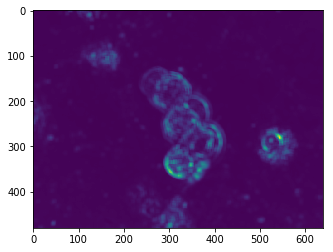

In [106]:
plt.figure()
plt.imshow( dst   , interpolation='nearest')